In [1]:
import tensorflow as tf
from tensorflow import keras 
import pandas as pd


In [2]:
df=pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)


In [5]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
print(df['Geography'].value_counts())
print(df['Gender'].value_counts())

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64


In [7]:
df=pd.get_dummies(df,columns=['Gender','Geography'],drop_first=True)

In [8]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,True,False,False
9996,516,35,10,57369.61,1,1,1,101699.77,0,True,False,False
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,True,False


In [9]:
df.replace({False: 0, True: 1}, inplace=True)

In [10]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,1,0


In [11]:
x=df.drop(columns='Exited')
y=df['Exited'].values

In [12]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scale=scaler.fit_transform(x_train)
x_test_scale=scaler.fit_transform(x_test)

In [24]:
model=keras.Sequential([
    keras.layers.Dense(11,input_shape=[11],activation='relu'),
    keras.layers.Dense(100,activation='sigmoid'),
    keras.layers.Dense(1)]
)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history=model.fit(x_train_scale,y_train,epochs=100,batch_size=50,verbose=1,validation_split=0.2)

Epoch 1/100
112/112 [==============================] - 2s 6ms/step - loss: 0.5094 - accuracy: 0.7920 - val_loss: 0.4471 - val_accuracy: 0.8071
Epoch 2/100
112/112 [==============================] - 0s 3ms/step - loss: 0.4480 - accuracy: 0.8059 - val_loss: 0.4459 - val_accuracy: 0.8136
Epoch 3/100
112/112 [==============================] - 0s 3ms/step - loss: 0.4395 - accuracy: 0.8152 - val_loss: 0.4504 - val_accuracy: 0.8179
Epoch 4/100
112/112 [==============================] - 0s 3ms/step - loss: 0.4305 - accuracy: 0.8205 - val_loss: 0.4001 - val_accuracy: 0.8271
Epoch 5/100
112/112 [==============================] - 0s 4ms/step - loss: 0.4432 - accuracy: 0.8209 - val_loss: 0.4002 - val_accuracy: 0.8293
Epoch 6/100
112/112 [==============================] - 0s 3ms/step - loss: 0.4323 - accuracy: 0.8232 - val_loss: 0.4165 - val_accuracy: 0.8321
Epoch 7/100
112/112 [==============================] - 0s 3ms/step - loss: 0.4565 - accuracy: 0.8136 - val_loss: 0.4398 - val_accuracy: 0.8179

In [21]:
model.evaluate(x_train_scale,y_train)

219/219 [==============================] - 1s 2ms/step - loss: 0.3710 - accuracy: 0.8500


[0.37101614475250244, 0.8500000238418579]

In [22]:
y_pred=model.predict(x_test)
y_pred

94/94 [==============================] - 0s 2ms/step


In [23]:
y_pred = y_pred.argmax(axis=-1)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

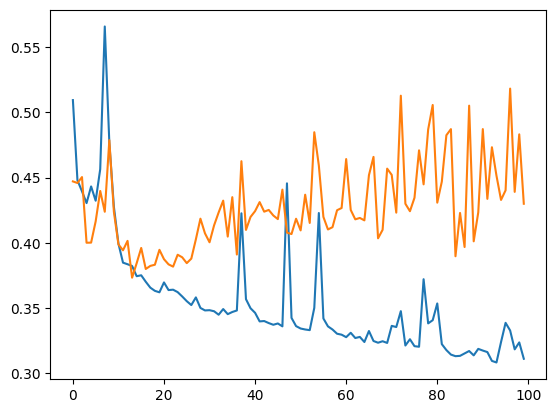

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

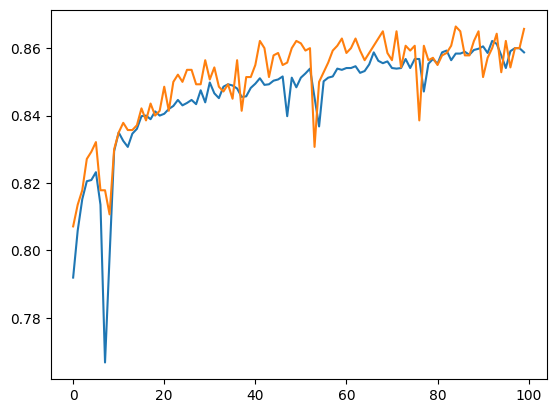

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

customer churn prediction using ANN

In [27]:
df1=pd.read_csv('customer_churn.csv')
df1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [29]:
df1.TotalCharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [31]:
pd.to_numeric(df1.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [32]:
df1[pd.to_numeric(df1.TotalCharges,errors='coerce').isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [45]:
df2=df1[df1.TotalCharges!=' ']


In [46]:
df2.TotalCharges=pd.to_numeric(df2.TotalCharges)

C:\Users\hp\AppData\Local\Temp\ipykernel_11504\101170965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.TotalCharges=pd.to_numeric(df2.TotalCharges)


In [47]:
df2.TotalCharges.dtype

dtype('float64')

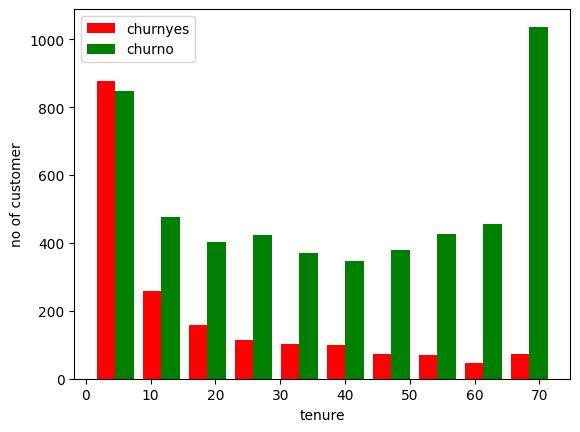

In [51]:
ten_churn_no=df2[df2.Churn=='No'].tenure
ten_churn_yes=df2[df2.Churn=='Yes'].tenure

plt.xlabel('tenure')
plt.ylabel('no of customer')

plt.hist([ten_churn_yes,ten_churn_no],color=['r','g'],label=['churnyes','churno'])
plt.legend()

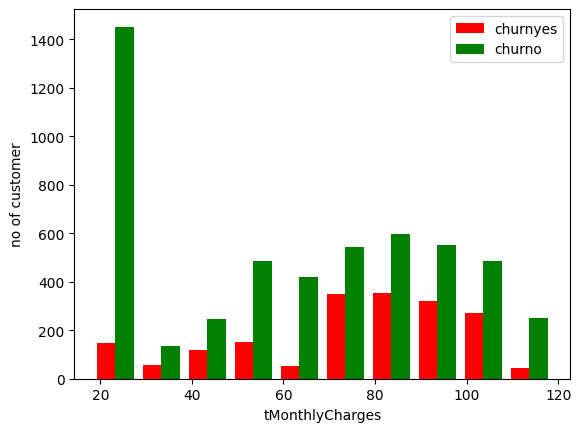

In [52]:
mon_no=df2[df2.Churn=='No'].MonthlyCharges
mon_yes=df2[df2.Churn=='Yes'].MonthlyCharges

plt.xlabel('tMonthlyCharges')
plt.ylabel('no of customer')

plt.hist([mon_yes,mon_no],color=['r','g'],label=['churnyes','churno'])
plt.legend()

In [55]:
def print_unique(df):
    for column in df:
        if df[column].dtype=='object':
            print(f'{column} : {df[column].unique()}')

In [56]:
print_unique(df2)

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [60]:
df2.replace('No phone service','No',inplace=True)
df2.replace('No internet service','No',inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_11504\1586932417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.replace('No phone service','No',inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_11504\1586932417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.replace('No internet service','No',inplace=True)


In [61]:
print_unique(df2)

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [63]:
df2.replace({'No':0,'Yes':1},inplace=True)
df2

C:\Users\hp\AppData\Local\Temp\ipykernel_11504\3897650540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.replace({'No':0,'Yes':1},inplace=True)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,DSL,1,...,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,1,1,72,1,1,Fiber optic,0,...,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,1,1,11,0,0,DSL,1,...,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,1,0,4,1,1,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [64]:
df2.replace({'Female':0,'Male':1},inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_11504\970341769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.replace({'Female':0,'Male':1},inplace=True)


In [68]:
x1=df2.drop(columns=['customerID','InternetService','Contract','PaymentMethod'])
y1=df2['Churn'].values

In [69]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,train_size=0.3)

In [73]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train1_scale=scaler.fit_transform(x_train1)
x_test1_scale=scaler.fit_transform(x_test1)


array([[-1.02060097, -0.43069417, -0.97240524, ..., -0.51790895,
        -0.89828089, -0.58519829],
       [ 0.97981487,  2.32183313,  1.02837784, ...,  1.24524815,
         1.09507934,  1.7088225 ],
       [-1.02060097, -0.43069417, -0.97240524, ..., -0.78196471,
        -0.24139529, -0.58519829],
       ...,
       [-1.02060097,  2.32183313,  1.02837784, ...,  0.36283398,
        -0.88189882, -0.58519829],
       [ 0.97981487, -0.43069417,  1.02837784, ..., -0.26555187,
         0.19190615, -0.58519829],
       [ 0.97981487, -0.43069417,  1.02837784, ...,  0.41464239,
         1.20614803, -0.58519829]])

In [72]:
df2.shape

(7032, 21)

In [77]:
mod=keras.Sequential([
    keras.layers.Dense(20,input_shape=[17],activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')]
)

mod.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])


hist=mod.fit(x_train1_scale,y_train1,batch_size=20,verbose=1,epochs=100,validation_split=0.2)

Epoch 1/100
85/85 [==============================] - 1s 5ms/step - loss: 0.6292 - accuracy: 0.6414 - val_loss: 0.4648 - val_accuracy: 0.8412
Epoch 2/100
85/85 [==============================] - 0s 3ms/step - loss: 0.3628 - accuracy: 0.8975 - val_loss: 0.3036 - val_accuracy: 0.9123
Epoch 3/100
85/85 [==============================] - 0s 3ms/step - loss: 0.2416 - accuracy: 0.9514 - val_loss: 0.2057 - val_accuracy: 0.9645
Epoch 4/100
85/85 [==============================] - 0s 3ms/step - loss: 0.1628 - accuracy: 0.9793 - val_loss: 0.1387 - val_accuracy: 0.9905
Epoch 5/100
85/85 [==============================] - 0s 2ms/step - loss: 0.1085 - accuracy: 0.9964 - val_loss: 0.0925 - val_accuracy: 0.9976
Epoch 6/100
85/85 [==============================] - 0s 2ms/step - loss: 0.0726 - accuracy: 0.9994 - val_loss: 0.0631 - val_accuracy: 1.0000
Epoch 7/100
85/85 [==============================] - 0s 2ms/step - loss: 0.0500 - accuracy: 1.0000 - val_loss: 0.0441 - val_accuracy: 1.0000
Epoch 8/100
8

In [79]:
y_pred1=mod.predict(x_test1_scale)
y_pred1

154/154 [==============================] - 0s 1ms/step


array([[9.9998540e-01],
       [7.4729978e-05],
       [9.9982584e-01],
       ...,
       [9.9999386e-01],
       [5.1212346e-06],
       [1.7758506e-05]], dtype=float32)

In [85]:
yp=[]
for element in y_pred1:
    if element>0.5:
        yp.append(1)
    else:
        yp.append(0)    

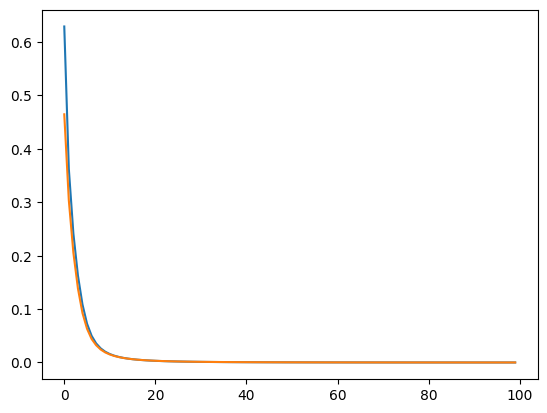

In [83]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

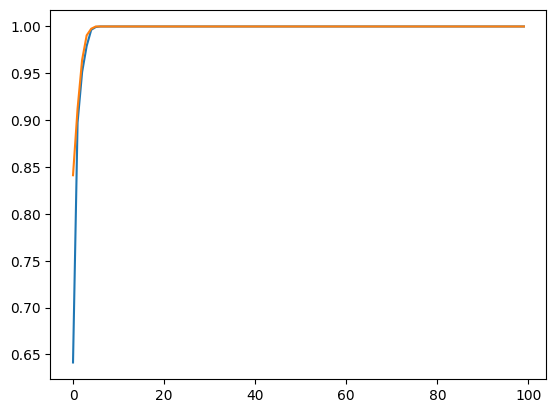

In [84]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])